# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

PREGUNTA 1:

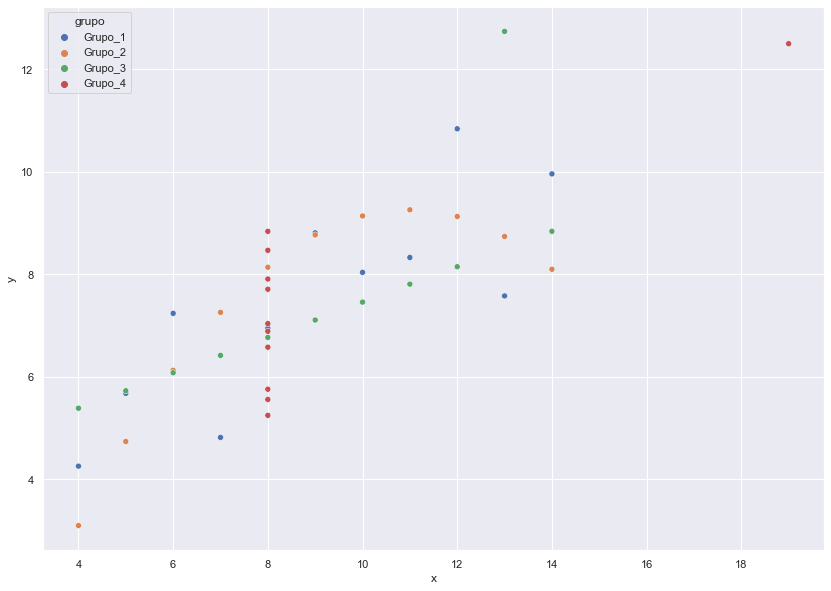

In [4]:
plt.figure(figsize=(14,10))
sns.scatterplot(
    x="x",
    y="y",
    hue="grupo",
    data=df
)
plt.show()

existen diferencias entre todos los grupos, esto nos dice que es probable que debamos usar distintos modelos de regresion para ajustar cada grupo. Por ejemplo se ve como el grupo 3 tiene un valor aislado, lo que da indicios de que probablemente debamos eliminar dicho punto y despues ajustar un modelo de regresión lineal.

PREGUNTA 2:

In [5]:
df_grupo=df.groupby(["grupo"])
df_grupo.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

Interpretación: Notamos que la desviación estandar para x e y son similares por cada grupo, pero esto puede ser un poco engañoso, dado que ya observamos el grafico de dispersion de los datos y pudimos ver que habian algunos datos bastantes separados de los demas, esto hace que se afecte dicha desviación.

PREGUNTA 3:

In [6]:
from sklearn.metrics import r2_score

In [7]:
df[df["grupo"]=="Grupo_1"]

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1
5,14,9.96,Grupo_1
6,6,7.24,Grupo_1
7,4,4.26,Grupo_1
8,12,10.84,Grupo_1
9,7,4.82,Grupo_1


In [8]:
#grupo 1
X1=np.array(df[df["grupo"]=="Grupo_1"][["x"]])
Y1=df[df["grupo"]=="Grupo_1"]["y"]

#ajustar el modelo

model_rl1 = LinearRegression() #creación
model_rl1.fit(X1,Y1) #ajuste

#predicciones
Y1_predict= model_rl1.predict(X1)

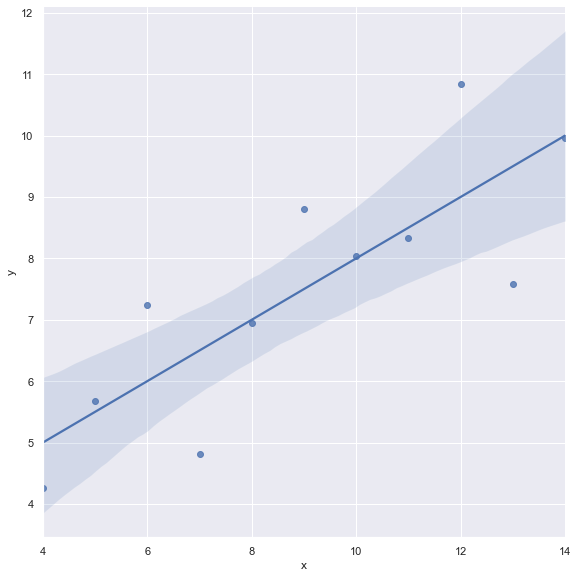

In [9]:
#grafico
sns.lmplot(
    x="x",
    y="y",
    data=df[df["grupo"]=="Grupo_1"],
    height = 8,
)
plt.show()

In [10]:
#grupo 2
X2=np.array(df[df["grupo"]=="Grupo_2"][["x"]])
Y2=df[df["grupo"]=="Grupo_2"]["y"]

#ajustar el modelo

model_rl2 = LinearRegression() #creación
model_rl2.fit(X2,Y2) #ajuste

#predicciones
Y2_predict= model_rl2.predict(X2)

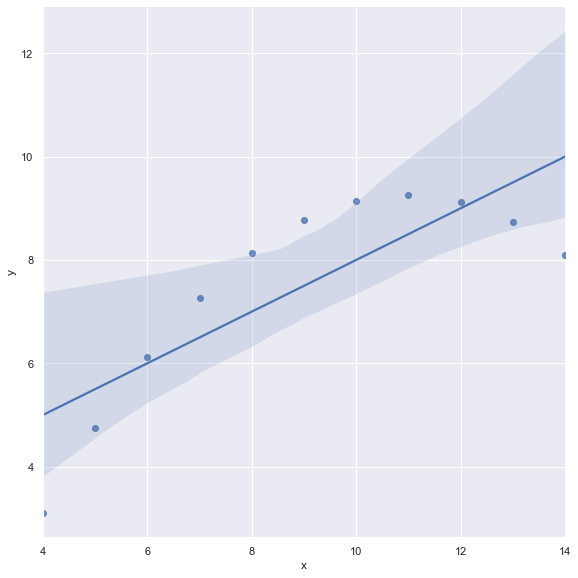

In [11]:
#grafico
sns.lmplot(
    x="x",
    y="y",
    data=df[df["grupo"]=="Grupo_2"],
    height = 8,
)
plt.show()

In [12]:
#grupo 3
X3=np.array(df[df["grupo"]=="Grupo_3"][["x"]])
Y3=df[df["grupo"]=="Grupo_3"]["y"]

#ajustar el modelo

model_rl3 = LinearRegression() #creación
model_rl3.fit(X3,Y3) #ajuste

#predicciones
Y3_predict= model_rl3.predict(X3)

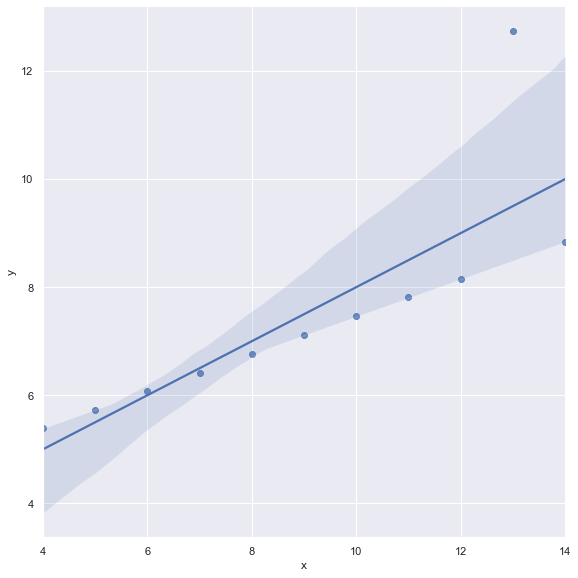

In [13]:
#grafico
sns.lmplot(
    x="x",
    y="y",
    data=df[df["grupo"]=="Grupo_3"],
    height = 8,
)
plt.show()

In [14]:
#grupo 4
X4=np.array(df[df["grupo"]=="Grupo_4"][["x"]])
Y4=df[df["grupo"]=="Grupo_4"]["y"]

#ajustar el modelo

model_rl4 = LinearRegression() #creación
model_rl4.fit(X4,Y4) #ajuste

#predicciones
Y4_predict= model_rl4.predict(X4)

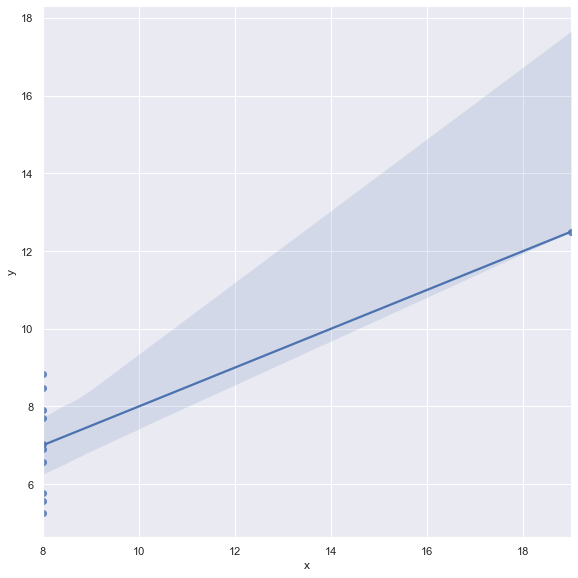

In [15]:
#grafico
sns.lmplot(
    x="x",
    y="y",
    data=df[df["grupo"]=="Grupo_4"],
    height = 8,
)
plt.show()

Interpretación: Podemos ver como claramente para algunos grupos este tipo de modelo no es el mejor, para el grupo 1 quizas puede ser un buen ajuste, para el grupo 2 quizas combiene otro ajuste no del tipo lineal, para el grupo 3 tenemos un punto aislado que probablemente esta afectando el ajuste, para el grupo 4 quizas combiene hacer el mismo ajuste pero de x con respecto a y.

PREGUNTA 4:

In [16]:
from metrics_regression import *
from sklearn.metrics import r2_score


In [17]:
#Grupo 1
df_1=pd.DataFrame(
    {
        "y":Y1,
        "yhat": Y1_predict
        }
)

df_1_metrics = summary_metrics(df_1)
df_1_metrics['r2'] = round(r2_score(Y1, Y1_predict),4)

df_1_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.8374,1.2512,1.1185,0.1213,0.119,0.1116,0.1048,0.1167,0.6665


In [18]:
#Grupo 2
df_2=pd.DataFrame(
    {
        "y":Y2,
        "yhat": Y2_predict
        }
)

df_2_metrics = summary_metrics(df_2)
df_2_metrics['r2'] = round(r2_score(Y2, Y2_predict),4)

df_2_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.9679,1.2524,1.1191,0.157,0.1504,0.129,0.1315,0.1438,0.6662


In [19]:
#Grupo 3
df_3=pd.DataFrame(
    {
        "y":Y3,
        "yhat": Y3_predict
        }
)

df_3_metrics = summary_metrics(df_3)
df_3_metrics['r2'] = round(r2_score(Y3, Y3_predict),4)

df_3_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.716,1.2506,1.1183,0.0797,0.0791,0.0955,0.0712,0.0814,0.6663


In [20]:
#Grupo 4
df_4=pd.DataFrame(
    {
        "y":Y4,
        "yhat": Y4_predict
        }
)

df_4_metrics = summary_metrics(df_4)
df_4_metrics['r2'] = round(r2_score(Y4, Y4_predict),4)

df_4_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.9027,1.2493,1.1177,0.1347,0.1324,0.1203,0.1167,0.1303,0.6667


Interpretación: Los valores para r2 son bastante parecidos, esto nos dice que el modelo de regresion linea ajusta casi de la misma manera a cada grupo, pero este dato puede ser algo engañoso porque si nos fijamos en las metricas los valores de estas son altos con respecto a lo que esperamos para un buen modelo, entonces tendremos que buscar la manera de ajustar mejor dichos modelos para asi reducir el valor de las metricas.

PROBLEMA 5:

Considero que para el grupo 1 se tiene un buen ajuste. Por lo tanto nos enfocaremos en los otros tres grupos.

Grupo 2:

In [21]:
X2

array([[10],
       [ 8],
       [13],
       [ 9],
       [11],
       [14],
       [ 6],
       [ 4],
       [12],
       [ 7],
       [ 5]], dtype=int64)

In [22]:
np.array(Y2).reshape(-1,1)

array([[9.14],
       [8.14],
       [8.74],
       [8.77],
       [9.26],
       [8.1 ],
       [6.13],
       [3.1 ],
       [9.13],
       [7.26],
       [4.74]])

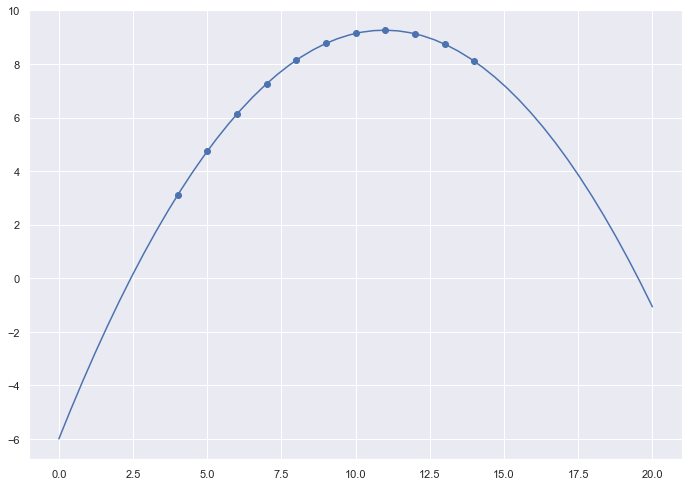

In [23]:
# Re-ajuste Grupo 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X2=np.array(df[df["grupo"]=="Grupo_2"][["x"]])
Y2=df[df["grupo"]=="Grupo_2"]["y"]

grade= 2
pr = make_pipeline(PolynomialFeatures(grade),LinearRegression())
pr.fit(X2,Y2)

plt.scatter(
    x="x",
    y="y",
    data=df[df["grupo"]=="Grupo_2"]
)
plt.plot(
    np.linspace(0,20).reshape(-1,1),
    pr.predict(np.linspace(0,20).reshape(-1,1)))
plt.show()




In [24]:
#Metricas:
df_2=pd.DataFrame(
    {
        "y":Y2,
        "yhat": pr.predict(np.array(Y2).reshape(-1,1)).flatten()
        }
)

df_2_metrics = summary_metrics(df_2)
df_2_metrics['r2'] = round(r2_score(Y2,pr.predict(np.array(X2).reshape(-1,1)).flatten()),4)

df_2_metrics



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.3578,0.3171,0.5631,0.0774,0.0732,0.0477,0.0618,0.0965,1.0


Grupo 3:

In [25]:
# Re-ajuste Grupo 3
# eliminamos el valor que estaba molestando, para esto notamos que dicho valor en y es mayor a 11
X3=np.array(df[(df["grupo"]=="Grupo_3") & (df["y"]<11)][["x"]])
Y3=np.array(df[(df["grupo"]=="Grupo_3") & (df["y"]<11)]["y"])
#Ahora hacemos el modelo

model_rl3 = LinearRegression() #creación
model_rl3.fit(X3,Y3) #ajuste

#predicciones
Y3_predict= model_rl3.predict(X3)




    

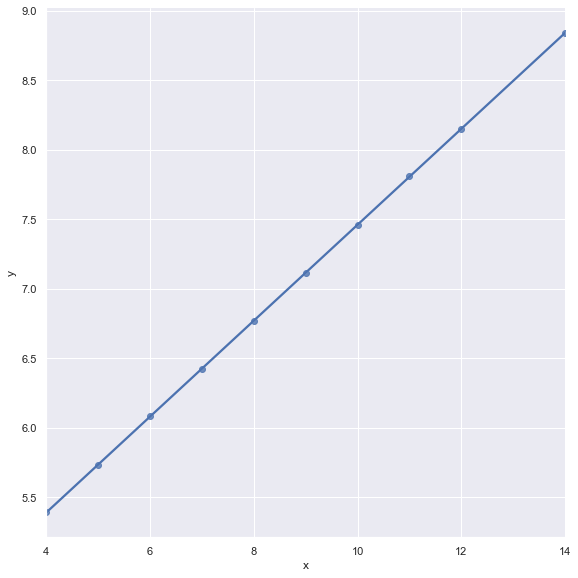

In [26]:
#Graficamente
sns.lmplot(
    x="x",
    y="y",
    data=df[(df["grupo"]=="Grupo_3") & (df["y"]<11)],
    height = 8,
)
plt.show()


In [27]:
#Ahora veamos las metricas:

df_3=pd.DataFrame(
    {
        "y":Y3,
        "yhat": Y3_predict
        }
)

df_3_metrics = summary_metrics(df_3)
df_3_metrics['r2'] = round(r2_score(Y3, Y3_predict),4)

df_3_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.0023,0.0,0.0028,0.0003,0.0003,0.0003,0.0003,0.0003,1.0


como r2 es igual a 1, tenemos que ahora el modelo si se ajusta bien.

Grupo 4:

In [28]:
#Reajuste Grupo 4:
#Primeramente notamos que el modelo podria mejorar si es que se cambia el eje x con el eje y. entonces:
X4=np.array(df[df["grupo"]=="Grupo_4"][["y"]]) #cambiamos el eje x por el y
Y4=df[df["grupo"]=="Grupo_4"]["x"] #cambiamos el eje y por x

#Modelo:
model_rl4 = LinearRegression() #creación
model_rl4.fit(X4.reshape(-1, 1),Y4) #ajuste
#predicciones
Y4_predict= model_rl4.predict(X4.reshape(-1, 1))
#se tuvo que usar reshape para pasar X4 a 1 dimension.

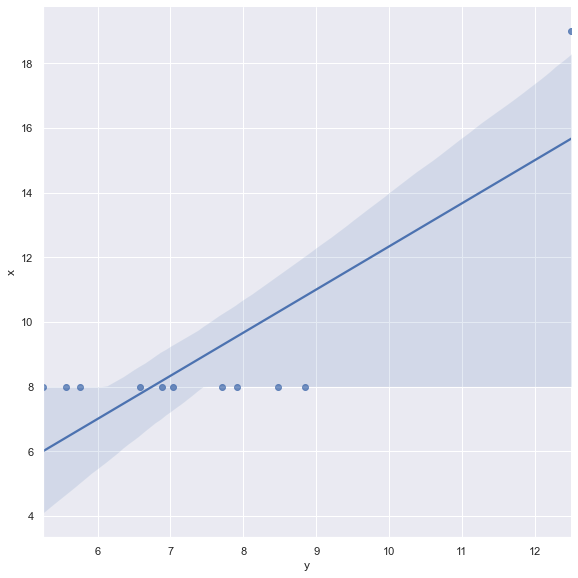

In [29]:
sns.lmplot(
    x="y",
    y="x",
    data=df[df["grupo"]=="Grupo_4"],
    height = 8,
)
plt.show()

In [30]:
#claramente el punto aislado molesta al ajuste, entonces vamos a eliminarlo:
Y4

33     8
34     8
35     8
36     8
37     8
38     8
39     8
40    19
41     8
42     8
43     8
Name: x, dtype: int64

In [31]:
#eliminamos el valor de indice 40:
X4=np.array(df[(df["grupo"]=="Grupo_4") & (df["x"]<18)]["y"])
Y4=np.array(df[(df["grupo"]=="Grupo_4") & (df["x"]<18)][["x"]])

#hacemos el modelo nuevamente:

model_rl4 = LinearRegression() #creación
model_rl4.fit(X4.reshape(-1, 1),Y4) #ajuste

#predicciones
Y4_predict= model_rl4.predict(X4.reshape(-1, 1))


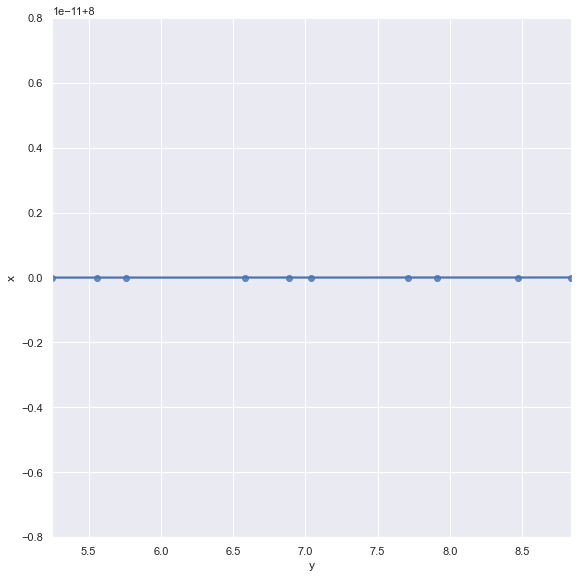

In [32]:
sns.lmplot(
    x="y",
    y="x",
    data=df[(df["grupo"]=="Grupo_4") & (df["x"]<18)],
    height = 8,
)
plt.show()

In [33]:
#Ahora calculamos las metricas:
df_4=pd.DataFrame(
    {
        "y":X4,
        "yhat": Y4_predict.flatten()
        }
)

df_4_metrics = summary_metrics(df_4)
df_4_metrics['r2'] = round(r2_score(Y4, Y4_predict),4)

df_4_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,1.261,2.3723,1.5402,0.2064,0.1974,0.1801,0.1769,0.1777,1.0


Nuevamente r2 dio 1, entonces ahora el ajuste es correcto.